Titanic challenge is a competition that has been launched on Kaggle and the question and the problem definition can be found [here](https://www.kaggle.com/c/titanic/overview) along with the explanation of the data.

The goal is to predict the which passengers survived on Titanic based on the data provided.


In [2]:
# importing the libraries

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='white')

# Get the Data

In [3]:
# importing the data from csv and reading it with pandas

train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# importing the test data from csv in a pandas dataframe

test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Analysis

In [5]:
# creating a copy for data exploration

titanic = train.copy()

In [6]:
# looking at the attributes

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# looking at the data

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# checking the values under the categorical variable Pclass

titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
# checking the values under the categorical variable SibSp

titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:
# checking the values under the categorical variable Ticket

titanic['Ticket'].value_counts()

347082           7
CA. 2343         7
1601             7
CA 2144          6
3101295          6
                ..
345765           1
695              1
PC 17599         1
SC/PARIS 2149    1
345572           1
Name: Ticket, Length: 681, dtype: int64

In [11]:
# checking the values under the categorical variable Embarked

titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
# defining the target variable

titanic_target = titanic['Survived']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDD8C3AD48>,
      dtype=object)

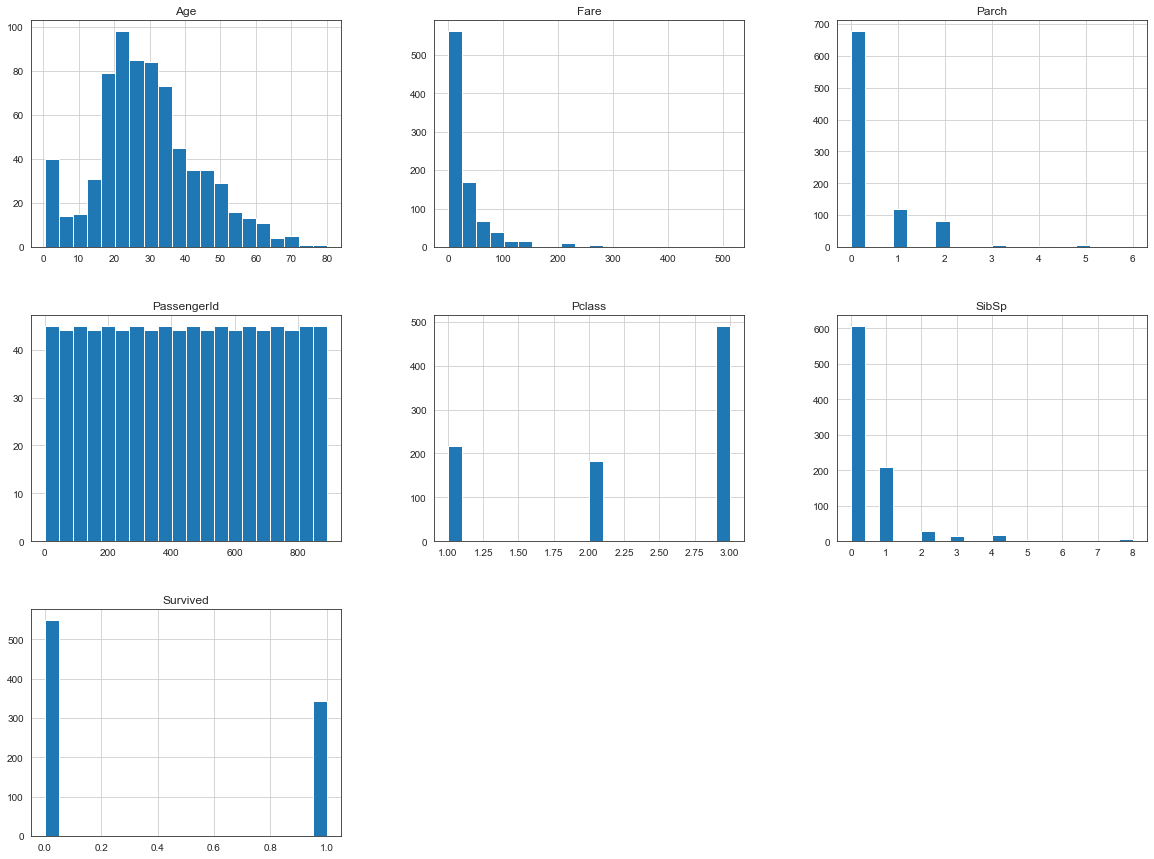

In [13]:
# visualizing the data

titanic.hist(bins=20, figsize=(20, 15))

In [14]:
# correlations between variables

corr_matrix = titanic.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

The most promising variables to predict the survivors are the 'Fare' and 'Pclass'.

The main transformations that can be done:
* drop the `Cabin` atribute 
* drop the instances that contain missing values under `Embarked` attribute
* input the missing variables under the attribute `Age`
* scale the numerical variables
* encode the categorical variables
* create new features based on the family size and the title of the people found in names

In [15]:
titanic.drop('Cabin', axis=1, inplace=True)
titanic.dropna(subset=['Embarked'], axis=0, inplace=True)

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Data Preparation

In [17]:
# dropping the target attribute

X_train = titanic.drop('Survived', axis=1)
y_train = titanic['Survived']

In [18]:
# create a new feature that describes the title of the person

X_train['Title'] = X_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
X_train['Title'].value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Sir           1
Lady          1
Mme           1
Capt          1
Countess      1
Don           1
Jonkheer      1
Ms            1
Name: Title, dtype: int64

In [19]:
# the values that are occuring on rare ocasions can be renamed as being a rare title

titles = X_train['Title'].value_counts().index.to_list()

rare_titles = titles[6:]


for title in rare_titles:
    X_train['Title'][X_train['Title'] == title] = 'Rare'

X_train['Title'].value_counts()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Mr        517
Miss      181
Mrs       124
Master     40
Rare       14
Dr          7
Rev         6
Name: Title, dtype: int64

In [20]:
# creating a new feature, `Family` from `SibSp` + `Parch`

X_train['Family'] = X_train['SibSp'] + X_train['Parch']
X_train.drop(['Parch', 'SibSp'], axis=1, inplace=True)

In [21]:
# dropping the unnecesary features

X_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [22]:
# creating a new feature that describes the people traveling alone

X_train['IsAlone'] = np.where(X_train['Family'] == 0, 1, 0)

In [23]:
# changing the type of categorical variables to object

X_train = X_train.astype(
    {'Pclass': 'object'})
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    object 
 1   Sex       889 non-null    object 
 2   Age       712 non-null    float64
 3   Fare      889 non-null    float64
 4   Embarked  889 non-null    object 
 5   Title     889 non-null    object 
 6   Family    889 non-null    int64  
 7   IsAlone   889 non-null    int32  
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 59.0+ KB


In [24]:
# defining the categorical and numerical attributes

cat_att = list(X_train.select_dtypes(include='object'))
num_att = list(X_train.select_dtypes(exclude='object'))

In [25]:
def simple_pipeline(X_train, num_att, cat_att, encoder):
    # creation of a pipeline to process the data

    # impute the missing variables and scale them
    num_pipeline = make_pipeline(SimpleImputer(
        strategy='median'), StandardScaler())

    # combining the pipelines
    full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_att),
        ('cat', encoder, cat_att),
    ])

    X_train_p = full_pipeline.fit_transform(X_train)

    return(X_train_p)

In [26]:
# defining the processed data as X_train_p and processing the data through the pipeline

X_train_p = simple_pipeline(X_train=X_train, cat_att=cat_att,
                            encoder=OneHotEncoder(sparse=False), num_att=num_att)
X_train_p.shape

(889, 19)

# Selecting potential models

In [27]:
def model_selection(models, cv):
    # checking the accuracy of a model for a quick assesment

    result_table = pd.DataFrame(columns=['model', 'score'])

    # compute scores
    for model in models:
        score = cross_val_score(model, X_train_p, y_train, cv=cv)
        result_table = result_table.append({
            'model': model.__class__.__name__,
            'score': f'Accuracy {score.mean():.2f} (+/- {score.std():.2f})'
        }, ignore_index=True)

    return result_table

In [28]:
# choosing appropriate models for assesment

models = [
    KNeighborsClassifier(),
    SVC(random_state=42),
    GaussianProcessClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
]

In [29]:
# checking the accuracy of the models using 3 folds.

model_selection(cv=3, models=models)

,model,score
0,KNeighborsClassifier,Accuracy 0.79 (+/- 0.02)
1,SVC,Accuracy 0.83 (+/- 0.01)
2,GaussianProcessClassifier,Accuracy 0.81 (+/- 0.03)
3,DecisionTreeClassifier,Accuracy 0.76 (+/- 0.01)
4,RandomForestClassifier,Accuracy 0.79 (+/- 0.02)
5,AdaBoostClassifier,Accuracy 0.81 (+/- 0.03)
6,GaussianNB,Accuracy 0.58 (+/- 0.13)


All the models performed relatively well except the Gaussian Naive Bayes one which scored poorly.

In [30]:
# Assesing their performance with ROC and AUC


def plot_rocs(classifiers, X_train, y_train, folds):

    # plotting multiple ROC

    result_table = pd.DataFrame(columns=['Classifiers', 'fpr', 'tpr', 'auc'])
    for cls in classifiers:
        y_pred = cross_val_predict(cls, X_train, y_train, cv=folds)

        fpr, tpr, _ = roc_curve(y_train, y_pred)
        auc = roc_auc_score(y_train, y_pred)

        result_table = result_table.append({
            'classifiers': cls.__class__.__name__,
            'fpr': fpr,
            'tpr': tpr,
            'auc': auc},
            ignore_index=True)
    result_table.set_index('classifiers', inplace=True)

    fig = plt.figure(figsize=(8, 6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'],
                 result_table.loc[i]['tpr'],
                 label=f'{i}, AUC = {result_table.loc[i][3]:.3f}',
                 )
    plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel('False Positive Rate', fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel('True Positive Rate', fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size': 13}, loc='lower right')

    plt.show()

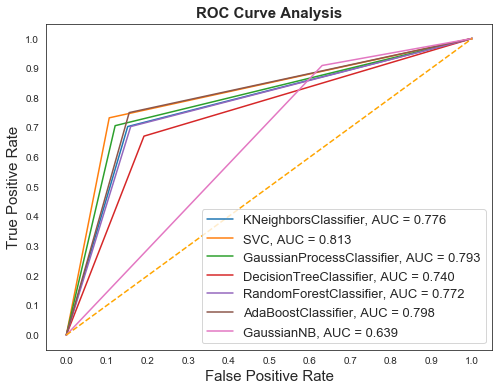

In [31]:
plot_rocs(models, X_train_p, y_train, 3)

In [32]:
# grid search for SVC

from sklearn.model_selection import GridSearchCV

param = [
    {'kernel': ['linear']},
    {'kernel': ['poly'], 'gamma': ['scale', 'auto'], 'degree': [3, 6, 9]},
    {'kernel': ['rbf'], 'gamma': ['scale', 'auto']},
    {'kernel': ['sigmoid'], 'gamma': ['scale', 'auto']},

]


grid_search_svc = GridSearchCV(SVC(
    random_state=42), param_grid=param, cv=5, scoring='accuracy', return_train_score=True)
grid_search_svc.fit(X_train_p, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'kernel': ['linear']},
                         {'degree': [3, 6, 9], 'gamma': ['scale', 'auto'],
                          'kernel': ['poly']},
                         {'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
                         {'gamma': ['scale', 'auto'], 'kernel': ['sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [34]:
# best score

grid_search_svc.best_score_

0.8346918047356059

In [35]:
# parameters that achieved the best score

grid_search_svc.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}